<a href="https://colab.research.google.com/github/mcnica89/DATA6100_F23/blob/main/Bootstrap/Medians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc

We want to understand the MEDIAN of a bunch of uniform random variables

In [2]:
N = 101
X = np.random.rand(N)
print("Median: ",np.median(X))

Median:  0.4968332875600062


In [3]:
def plot_and_CI(median_samples,my_title):
  plt.hist( median_samples )
  plt.title(my_title)
  plt.axvline(0.5, color='k', linestyle='dashed', linewidth=1)

  sorted_medians = np.sort(median_samples)
  N_samples = len(sorted_medians)
  CI_up = sorted_medians[int(0.975*N_samples)]
  CI_low = sorted_medians[int(0.025*N_samples)]

  print(f"95% CI: {CI_low:.3f} to {CI_up:.3f}" )
  print(f"95% CI width: {CI_up - CI_low:.3f}")

# Theoretical Medians



95% CI: 0.404 to 0.595
95% CI width: 0.191


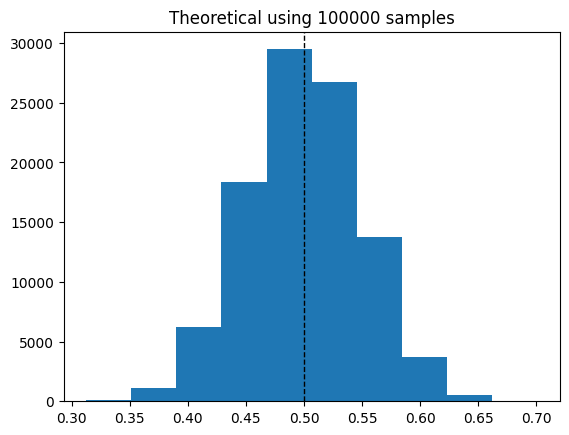

In [4]:
def generate_theory_medians(N,N_samples):
  X = np.random.rand(N,N_samples)
  median = np.median(X,axis=0)
  return median

N_samples = 100000
medians = generate_theory_medians(N,N_samples)
plot_and_CI(medians,my_title=f'Theoretical using {N_samples} samples')

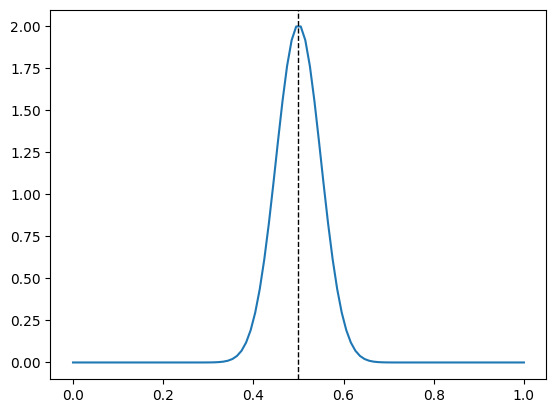

In [5]:
#Theoretically, the median will be a beta distribution
x_axis = np.linspace(0,1,100)
k = (N+1)/2
beta = x_axis**(k)*(1-x_axis)**(k)/sc.beta(k,k)
plt.plot(x_axis,beta)
plt.axvline(0.5, color='k', linestyle='dashed', linewidth=1)

# Using one single data set and Leave One Out Error

In [6]:
N = 101
X = np.random.rand(N)
print("Median: ",np.median(X))

Median:  0.3986747890991159


95% CI: 0.385 to 0.400
95% CI width: 0.014


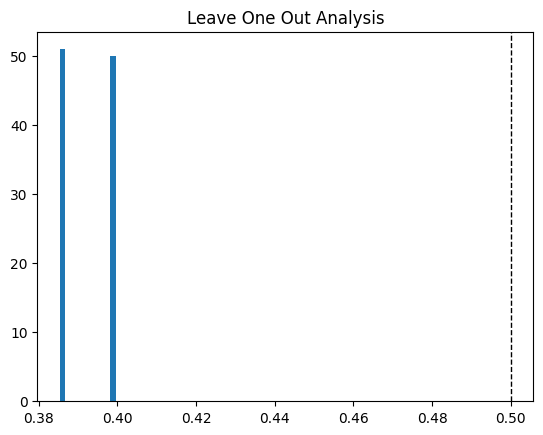

In [7]:
def leave_one_out_analysis(X):
  LOO_median = np.zeros_like(X)
  for i in range(N):
    x_temp = X[i]
    X[i] = np.nan
    LOO_median[i] = np.nanmedian(X)
    X[i] = x_temp
  return LOO_median

plot_and_CI(leave_one_out_analysis(X),'Leave One Out Analysis')

# Using one single data set and "Ordinary" Validation

In [8]:
N = 101
X = np.random.rand(N)
print("Median: ",np.median(X))

Median:  0.44266718510864544


In [9]:
def test_median_ordinary(X,p_train = 0.5):

  perm = np.random.permutation(N)

  N_train = int(p_train*N)

  X_train,X_test = X[perm[0:N_train]], X[perm[N_train:N]]

  return np.median(X_train)

95% CI: 0.381 to 0.527
95% CI width: 0.146


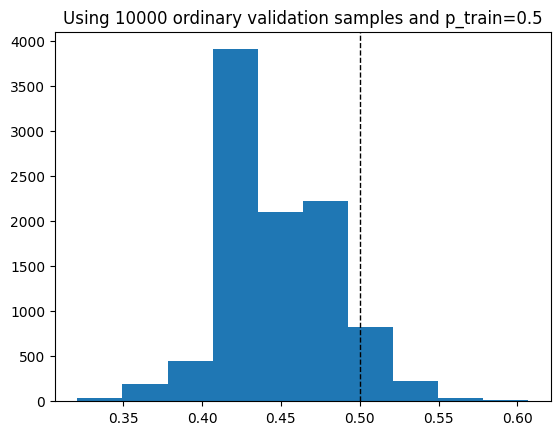

In [10]:
N_samples = 10000
p_train = 0.5
medians = np.array([test_median_ordinary(X,p_train) for i in range(N_samples)])
plot_and_CI(medians,my_title=f'Using {N_samples} ordinary validation samples and p_train={p_train}')

# Using one single data set and k-Fold Cross Validation

In [11]:
N = 101
X = np.random.rand(N)
print("Median: ",np.median(X))

Median:  0.5050268261972598


In [12]:
def test_median_k_fold(k=5):

  perm = np.random.permutation(N)

  N_per_fold = int(N/k)
  N_train = [N_per_fold*i for i in range(k+1)]
  X_fold = np.zeros((k,N_per_fold))
  for i in range(k):
    X_fold[i,:] = X[ perm[N_train[i]:N_train[i+1]]]


  return np.median(X_fold,axis=1)

In [13]:
test_median_k_fold(5)

array([0.57006394, 0.62631208, 0.54129901, 0.39230073, 0.53193398])

95% CI: 0.491 to 0.561
95% CI width: 0.070


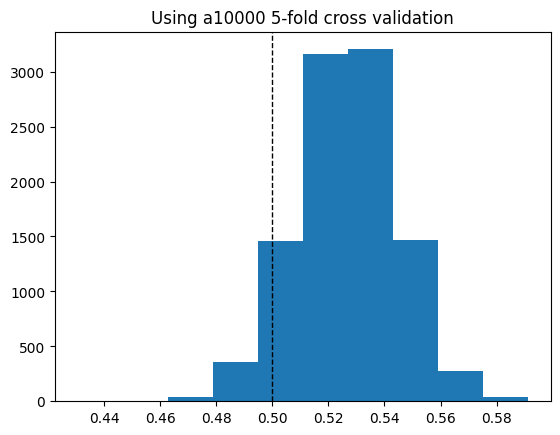

In [14]:
medians = np.array( [np.mean(test_median_k_fold(5)) for i in range(N_samples)] )
plot_and_CI(medians,my_title=f'Using a{N_samples} 5-fold cross validation')

# Bootstrap

In [15]:
N = 101
X = np.random.rand(N)
print("Median: ",np.median(X))

Median:  0.5219411282123071


95% CI: 0.376 to 0.619
95% CI width: 0.243


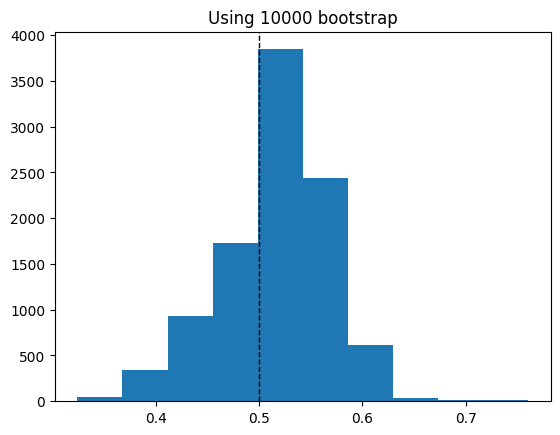

In [16]:
def test_median_bootstrap():
  ix = np.random.randint(0,N,size=N)
  return np.median(X[ix])

N_samples = 10000
medians = np.array( [test_median_bootstrap() for i in range(N_samples)] )
plot_and_CI(medians,my_title=f'Using {N_samples} bootstrap')

Text(0.5, 1.0, 'Comparison of CDFs')

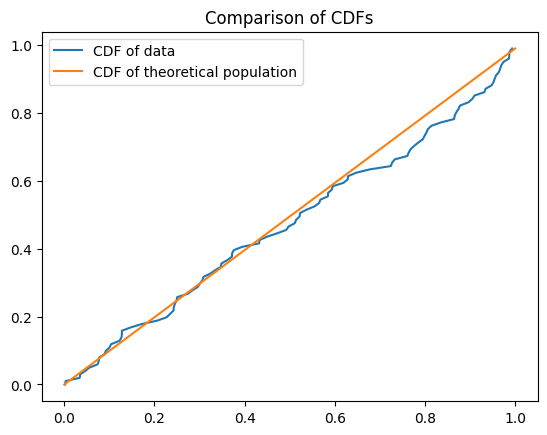

In [17]:
cdf_x = np.sort(X)
cdf_y = np.arange(len(X))/len(X)
plt.plot(cdf_x,cdf_y,label='CDF of data')
plt.plot(np.linspace(0,1,len(X)),cdf_y,label='CDF of theoretical population')
plt.legend()
plt.title("Comparison of CDFs")

# Extra stuff